# Unsupervise learning using k-means Clustering

## Overview

K-means clustering is a popular unsupervised learning algorithm used for clustering data points into groups or clusters based on their similarity. It is widely used in various fields such as image segmentation, document clustering, and customer segmentation. The k-means algorithm aims to minimize the sum of squared distances between the data points and their nearest cluster center, also known as centroids.


Objectives:
1. To implement k-means clustering in Python using the SciPy library.
2. To evaluate the performance of our algorithm.
3. To determine an optimal value for k.

In the following steps we an example for clustering using Numpy and SciPy:

### Step1: Creating and vizualising a Mock Database

We will create a mock database with random data points using NumPy. For this we will generate a dataset with 50 samples and 2 features. Observe that we have no class apriory apointed to the samples. 

In [1]:
import numpy as np

# Generate a random dataset with 50 samples and 2 features
np.random.seed(0)
X = np.random.randn(50, 2)


We will define two functions that will allow us to visualise the points and the belonging cluster (if K means is performed)

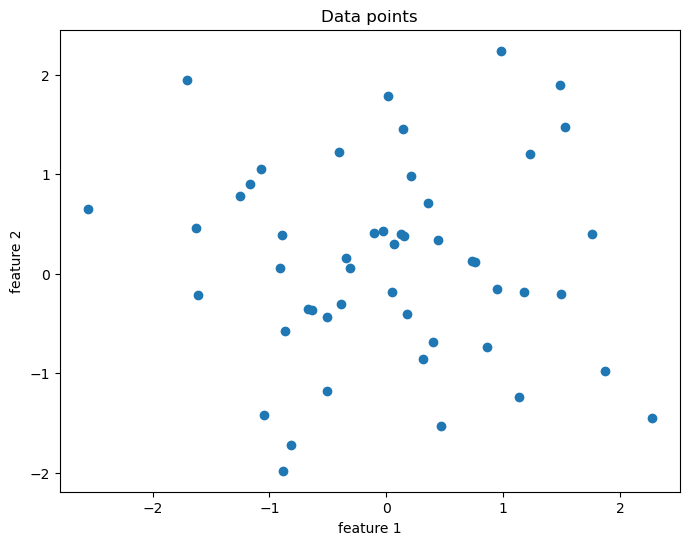

In [2]:
import matplotlib.pyplot as plt

def plot_data(X):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    # put a caption on the plot
    plt.title('Data points')
    # label the x-axis
    plt.xlabel('feature 1')
    # label the y-axis
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    # Plot the data points and their assigned labels
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()


plot_data(X)

### Step 2: Implementing k-means Clustering in Python with SciPy

We will use the *scipy.cluster* module to implement **k-means clustering**. We specify the number of clusters as 3 and perform k-means clustering on the dataset using the kmeans function. We also assign each data point to a cluster using the *vq* function. Finally, we print the assigned labels.

[2 1 2 2 1 1 2 1 2 2 0 2 2 2 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 2 0 0 2 2
 2 0 0 0 2 1 2 1 1 1 1 1 1]


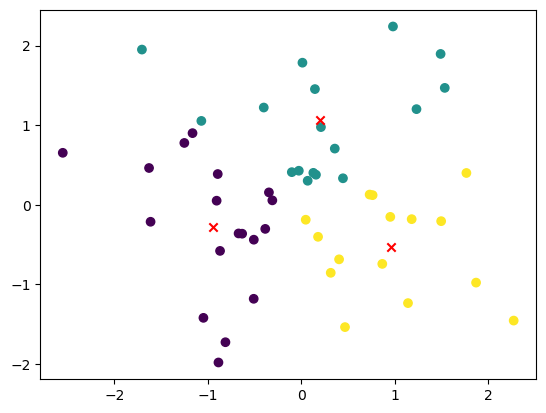

In [3]:
from scipy.cluster.vq import kmeans, vq

# Specify the number of clusters
k = 3

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)


### Step 3: Varying the Number of Clusters
In the previous example, we specified the number of clusters as 3. You can experiment with different values of k and see how the clustering results change.

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0]


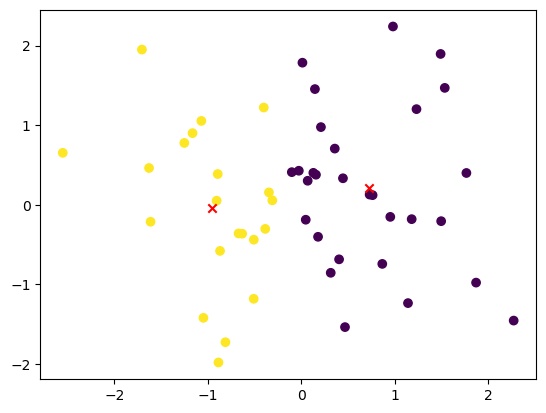

In [4]:
# Specify the number of clusters
k = 2

# Perform k-means clustering on the dataset
centroids, _ = kmeans(X, k)

# Assign each data point to a cluster
labels, _ = vq(X, centroids)

# Print the assigned labels
print(labels)

plot_data_clusters(X, labels, centroids)


### Step 4: Evaluating the Clustering Results

We can evaluate the quality of the clustering results using different metrics such as the *Silhouette score* and the *Calinski-Harabasz index*.


1. The *Silhouette score* shows how far apart the data points in a cluster are compared to how far apart the data points in other clusters are. Both cohesion and separation are taken into account.

A score of -1 means that the data point is far away from other points in its own cluster and close to points in neighboring clusters. 

A score of 1 means that the data point is close to other points in its own cluster and far away from points in neighboring clusters. 

A number of 0 means that the data point is right on the edge of two groups.


To figure out the Silhouette score for a clustering solution, we first figure out the average Silhouette score for each data point in the dataset. Then, we take the mean of these scores as the Silhouette score for the clustering solution. Better performance in grouping is shown by a higher Silhouette score.

The Silhouette score can be used to judge the quality of clustering solutions with different numbers of groups or different methods for clustering. The best number of clusters for a given dataset can also be found by comparing the Silhouette scores for different numbers of clusters.

2. The *Calinski-Harabasz index* (also known as the Variance Ratio Criterion) is a measure of how well-separated clusters are in a clustering solution. It measures the ratio of the between-cluster variance to the within-cluster variance, and a higher Calinski-Harabasz index indicates better clustering performance.

The Calinski-Harabasz index is defined as follows:

$$ CH = \frac{\frac{B}{k - 1}}{\frac{W}{n - k}} $$ 

where $B$ is the between-cluster variance, $W$ is the within-cluster variance, $k$ is the number of clusters, and $n$ is the total number of data points.

The between-cluster variance $B$ is the sum of the squared distances between the cluster centroids and the global mean, weighted by the number of data points in each cluster. 

The within-cluster variance $W$ is the sum of the squared distances between each data point and its own cluster centroid.

To compute the Calinski-Harabasz index for a clustering solution, we first calculate the between-cluster and within-cluster variances, and then use the formula above to calculate the index.


In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate the clustering results using the Silhouette score
silhouette_score = silhouette_score(X, labels)
print(f'Silhouette score: {silhouette_score:.2f}')

# Evaluate the clustering results using the Calinski-Harabasz index
calinski_harabasz_score = calinski_harabasz_score(X, labels)
print(f'Calinski-Harabasz index: {calinski_harabasz_score:.2f}')


ValueError: Found input variables with inconsistent numbers of samples: [250, 100]

We used the *silhouette_score* and *calinski_harabasz_score* functions from Scikit-learn to evaluate the clustering results. A higher Silhouette score indicates better clustering results, while a higher Calinski-Harabasz index indicates better separation between clusters.

There are other metrics (like *Dunn index* or *Davies–Bouldin index*) that will be presented on the lecture.

### Step 4: Determine the optimum number of clusters using the *elbow method* 

Plott the sum of squared distances between data points and their cluster centroids (also known as 
$WCSS$ - the within-cluster sum of squares) as a function of the number of clusters, and looking for the "elbow" in the plot where the rate of decrease in $WCSS$ starts to level off.

To compare the clustering performance using the elbow method, we can plot the $WCSS$ for different numbers of clusters and look for the number of clusters at which the $WCSS$ starts to level off. A smaller $WCSS$ indicates better clustering performance, but we also want to avoid overfitting the data by using too many clusters.

We can compute the $WCSS$ using the *kmeans* function from the *scipy.cluster.vq* module and the *inertia_* attribute of the resulting KMeans object. 

As we can see from the plot probably a good value for $k$ can be $25$ or $30$ were we get $WCSS$ around $0.5$. (Is an empirical decision of the data sceintist)

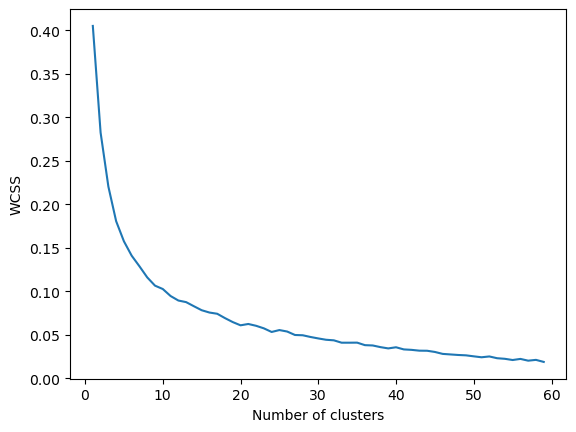

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Generate a random dataset
np.random.seed(62)
X = np.random.rand(100, 2)

# Compute the WCSS for different numbers of clusters
wcss = []
for k in range(1, 60):
    centroids, distortion = kmeans(X, k)
    wcss.append(distortion)

# Plot the WCSS vs. the number of clusters
plt.plot(range(1, 60), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Example 1:

Another basic implementation of the k-means clustering algorithm using NumPy and SciPy.

The *cdist* function computes the pairwise distances between the centroids and the data points in the dataset $X$.

[1 2 2 2 0 2 2 2 0 1 0 2 2 1 1 1 2 1 0 2 2 1 1 0 0 1 0 0 2 2 1 1 2 2 1 2 2
 0 1 0 0 0 2 2 0 2 2 0 2 1 0 2 2 0 1 2 0 2 0 2 1 1 0 1 0 2 0 2 2 1 0 0 2 2
 0 1 1 0 1 0 1 1 0 2 0 2 0 2 0 2 1 0 1 2 2 2 0 0 0 1]


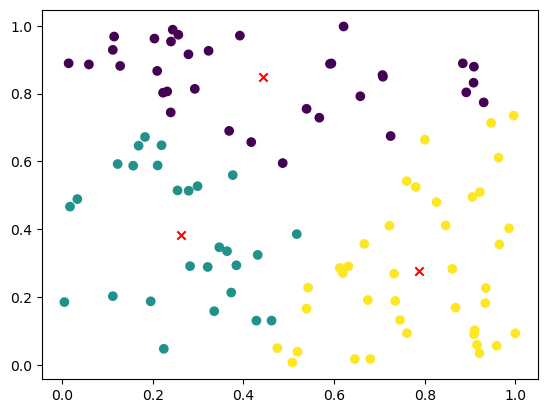

In [47]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_basic(X, k, max_iter=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    return labels, centroids

labels, centroids = kmeans_basic(X, k=3)
print(labels)

plot_data_clusters(X, labels, centroids)

## Example 2: Computing the similarity between clusters using the mean distance between elements

An implementation of a function to compute the similarity between clusters using the mean distance between elements:

The *cdist* function computes the pairwise distances between all data points in the dataset $X$. We then iterate over the unique cluster labels and compute the mean distance between elements in each cluster. We sum up the mean distances for all clusters and divide by the number of clusters to obtain the average mean distance between elements. This value is then returned as the similarity measure between clusters.

You can use this function to compare the performance of k-means clustering using different similarity measures, such as Euclidean distance and mean distance. Simply pass in the data X and the cluster labels obtained from k-means clustering. The function returns a similarity value that can be used to evaluate the clustering performance.

In [48]:
from scipy.spatial.distance import cdist

def mean_distance_similarity(X, labels):
    # Compute the mean distance between elements in each cluster
    distances = cdist(X, X)
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)
    
    # Normalize the similarity by the number of clusters
    similarity /= len(np.unique(labels))
    
    return similarity

# Compute the mean distance similarity
mean_distance_similarity = mean_distance_similarity(X, labels)
print(f'Mean distance similarity: {mean_distance_similarity:.2f}')



Mean distance similarity: 0.32


Exercises: 

1. Modify the mock database to have 100 samples and 3 features. Perform k-means clustering with k=4 and visualize the results using different marker styles for each cluster.

2. Implement a new similarity measure based on Manhattan (cityblock) distance for k-means clustering and compare the clustering performance using Silhouette score and Calinski-Harabasz index with the Euclidean distance measure.

Hint: check the documentation for the *cdist* function.

3. Generate a new mock database with 5 clusters and 2 features. Perform k-means clustering with different values of k (2, 3, 4, 5, 6) and compare the clustering performance using the elbow method. 

Hint: to create the database choose random 5 points (the centroids); generate 5 random values for the clusters radiuses for each centroid in such a way that the circles are disjoint; within eacho of the 5 circles generate 20 random points.  

4. Use the iris dataset from Scikit-learn and perform k-means clustering with k=3. Visualize the results using a scatter plot with different marker styles for each cluster. Evaluate the clustering performance using Silhouette score and Calinski-Harabasz index.

C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


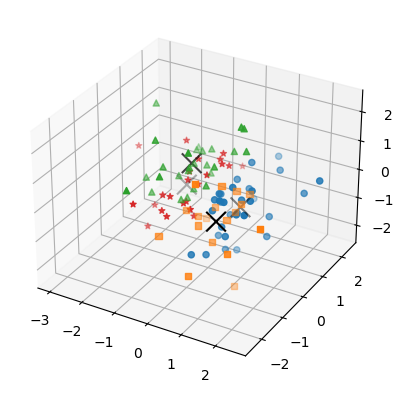

In [53]:
from mpl_toolkits.mplot3d import Axes3D  # import the 3D plotting toolkit

np.random.seed(10)
X = np.random.randn(100, 3)

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

markers = ['o', 's', '^', '*']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # create a 3D subplot

for i, marker in enumerate(markers):
    ax.scatter(X[labels==i, 0], X[labels==i, 1], X[labels==i, 2], marker=marker)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           marker='x', s=200, color='black')
plt.show()


In [54]:
from sklearn.cluster import KMeans

kmeans_euclidean = KMeans(n_clusters=4, random_state=0)
labels_euclidean = kmeans_euclidean.fit_predict(X)
silhouette_score_euclidean = silhouette_score(X, labels_euclidean)
calinski_harabasz_score_euclidean = calinski_harabasz_score(X, labels_euclidean)

print(f'Silhouette score: {silhouette_score_euclidean:.2f}')
print(f'Calinski-Harabasz index: {calinski_harabasz_score_euclidean:.2f}')

# Perform k-means clustering with k=4 using Manhattan distance measure
kmeans_manhattan = KMeans(n_clusters=4, random_state=0)
labels_manhattan = kmeans_manhattan.fit_predict(X)
silhouette_score_manhattan = silhouette_score(X, labels_manhattan, metric='manhattan')
calinski_harabasz_score_manhattan = calinski_harabasz_score(X, labels_manhattan)

print(f'Silhouette score manhattan: {silhouette_score_manhattan:.2f}')
print(f'Calinski-Harabasz index manhattan: {calinski_harabasz_score_manhattan:.2f}')


C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score: 0.26
Calinski-Harabasz index: 35.33


C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score manhattan: 0.25
Calinski-Harabasz index manhattan: 35.33


C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

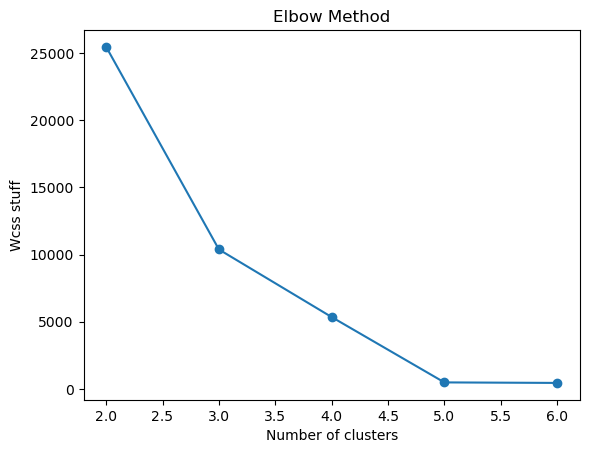

In [55]:
np.random.seed(0)
X = np.concatenate([np.random.randn(50, 2) + np.array([i * 10, i * 10]) for i in range(5)])

wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares vs. k and use the elbow method to determine the optimal value of k
plt.plot(range(2, 7), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss stuff')
plt.title('Elbow Method')
plt.show()

C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alen\Anaconda\envs\alenAI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


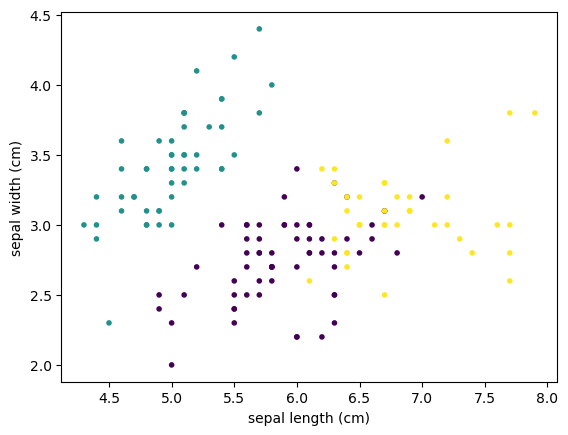

Silhouette score: 0.5528190123564095
Calinski-Harabasz score: 561.62775662962


In [56]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
print('Silhouette score:', silhouette)
print('Calinski-Harabasz score:', calinski_harabasz)